In [1]:
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report


In [2]:
# Read pickle file on google's My Drive/melanoma_images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Try listing the contents of the directory to check if the file exists
!ls "/content/drive/My Drive/pickles/"


X_test.pkl  X_train.pkl  X_val.pkl  y_test.pkl	y_train.pkl  y_val.pkl


In [ ]:
# with open('/content/drive/My Drive/melanoma_images/X_train.pkl', 'rb') as file:
#    X_train = pickle.load(file)

In [ ]:
# with open('/content/drive/My Drive/melanoma_images/X_val.pkl', 'rb') as file:
#    X_val = pickle.load(file)

In [4]:
# Load the images from the pkl file

with open('/content/drive/My Drive/pickles/X_train.pkl', 'rb') as file:
# with open('pickles/X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('/content/drive/My Drive/pickles/X_val.pkl', 'rb') as file:
# with open('pickles/X_val.pkl', 'rb') as file:
    X_val = pickle.load(file)

with open('/content/drive/My Drive/pickles/X_test.pkl', 'rb') as file:
# with open('pickles/X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

In [5]:
# Open Label Files
with open('/content/drive/My Drive/pickles/y_train.pkl', 'rb') as file:
#with open('pickles/y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('/content/drive/My Drive/pickles/y_val.pkl', 'rb') as file:
#with open('pickles/y_val.pkl', 'rb') as file:
    y_val = pickle.load(file)

with open('/content/drive/My Drive/pickles/y_test.pkl', 'rb') as file:
#with open('pickles/y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [6]:
print("X_train shape:", X_train.shape)
print("X_val shape  :", X_val.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape  :", y_val.shape)
print("y_test shape :", y_test.shape)

X_train shape: (6682, 300, 300, 3)
X_val shape  : (1671, 300, 300, 3)
X_test shape : (2652, 300, 300, 3)
y_train shape: (6682,)
y_val shape  : (1671,)
y_test shape : (2652,)


In [7]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [8]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6682, 2)
(1671, 2)
(2652, 2)


In [9]:
# Define a CNN model
model = keras.Sequential([
    layers.Input((300, 300, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

In [ ]:
# # Define a CNN model
# model = keras.Sequential([
#     layers.Input((300, 300, 3)),
#     layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(2, activation='sigmoid')
# ])

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Create call back functions
# Import the callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the callbacks
checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min")
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss", mode="min")
reduce_lr_cb = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, monitor="val_loss", mode="min")


In [12]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
                    )


Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.6650 - loss: 0.5736 - val_accuracy: 0.8534 - val_loss: 0.3466 - learning_rate: 1.0000e-04
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8518 - loss: 0.3455 - val_accuracy: 0.8671 - val_loss: 0.2927 - learning_rate: 1.0000e-04
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8806 - loss: 0.2853 - val_accuracy: 0.8636 - val_loss: 0.3469 - learning_rate: 1.0000e-04
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8842 - loss: 0.2784 - val_accuracy: 0.8803 - val_loss: 0.2879 - learning_rate: 1.0000e-04
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8903 - loss: 0.2611 - val_accuracy: 0.8737 - val_loss: 0.2656 - learning_rate: 1.0000e-04
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8896 - loss: 0.2498 - val_accuracy: 0.8923 - val_loss: 0.2573 - learning_rate: 1.0000e-04
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/st

In [ ]:
# # Train the model
# history = model.fit(X_train, y_train,
#                     epochs=50, batch_size=32,
#                     validation_data=(X_val, y_val),
#                     callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
#                     )

Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7083 - loss: 0.5222 - val_accuracy: 0.8288 - val_loss: 0.4014 - learning_rate: 1.0000e-04
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8588 - loss: 0.3243 - val_accuracy: 0.8689 - val_loss: 0.3085 - learning_rate: 1.0000e-04
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8882 - loss: 0.2716 - val_accuracy: 0.8767 - val_loss: 0.2935 - learning_rate: 1.0000e-04
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.8926 - loss: 0.2578 - val_accuracy: 0.8809 - val_loss: 0.2963 - learning_rate: 1.0000e-04
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8991 - loss: 0.2520 - val_accuracy: 0.8959 - val_loss: 0.2655 - learning_rate: 1.0000e-04
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9061 - loss: 0.2283 - val_accuracy: 0.8977 - val_loss: 0.2502 - learning_rate: 1.0000e-04
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/ste

In [13]:
# Evaluate the model using the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9136 - loss: 0.2041
Test accuracy: 0.9200603365898132


In [14]:
# Predict using the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
print(y_pred_probs)

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
[[2.69209057e-01 2.30833918e-01]
 [6.28198385e-01 2.75459588e-01]
 [1.11979112e-01 6.45063877e-01]
 ...
 [9.17259991e-01 2.87903193e-02]
 [9.30880429e-04 9.98474658e-01]
 [1.04628816e-01 7.85923183e-01]]


In [15]:
print(y_pred[:50])
print(y_true[:50])

[0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 0 1]
[0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1]


In [16]:
# plot images with True and predicted values from model
# Set up the subplot grid
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over the subplot grid
for i, ax in enumerate(axes.flat):
    if i < 50:
        # Read the image
        img = X_test[i]

        # Display the image
        # ax.imshow(img*255).astype('uint8')  # gives an error
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels
        ax.set_title(f"True: {y_true[i]}, Predicted: {y_pred[i]}")
        #ax.set_title(f'Image {i+1}', fontsize=8)
    # else:
    #     # Remove the empty subplot
    #     ax.remove()

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')  # Use 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')
roc_auc = roc_auc_score(y_true, y_pred_probs[:, 1])  # Use probabilities for AUC

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.93
Recall: 0.90
F1 Score: 0.92
AUC-ROC: 0.97


# Can we use thresholding to improve performance?

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
#print(conf_matrix)
conf_matrix

Confusion Matrix:


array([[1283,   86],
       [ 126, 1157]])

In [19]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1369
           1       0.93      0.90      0.92      1283

    accuracy                           0.92      2652
   macro avg       0.92      0.92      0.92      2652
weighted avg       0.92      0.92      0.92      2652



# Save the Model

In [28]:
# Save the model
model.save('/content/drive/My Drive/saved_model/melanoma_cnn_model.keras')

# Plots

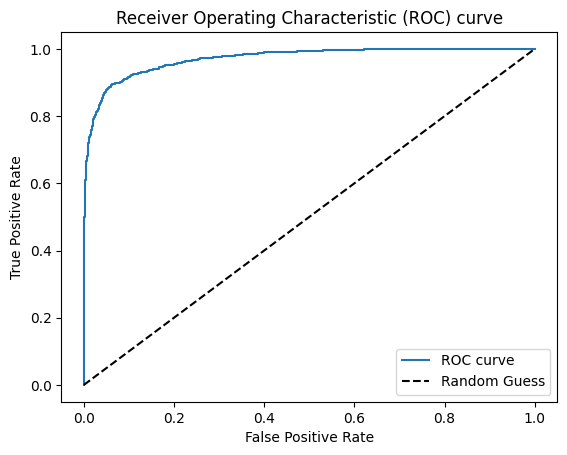

In [25]:
# Plotting ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs[:, 1])
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.legend()
plt.show()

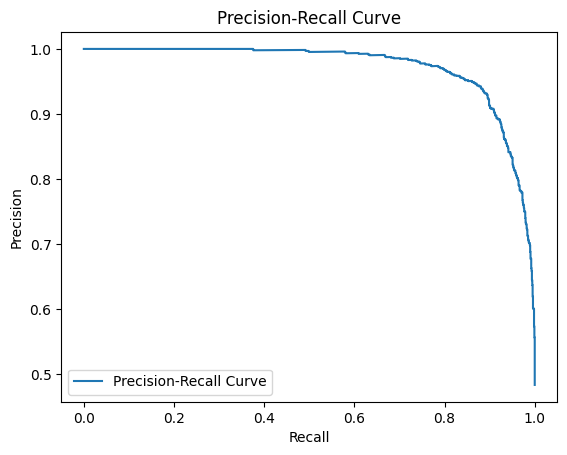

In [26]:
# Plotting Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, thresholds = precision_recall_curve(y_true, y_pred_probs[:, 1])
plt.plot(recall_vals, precision_vals, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

Add plots -
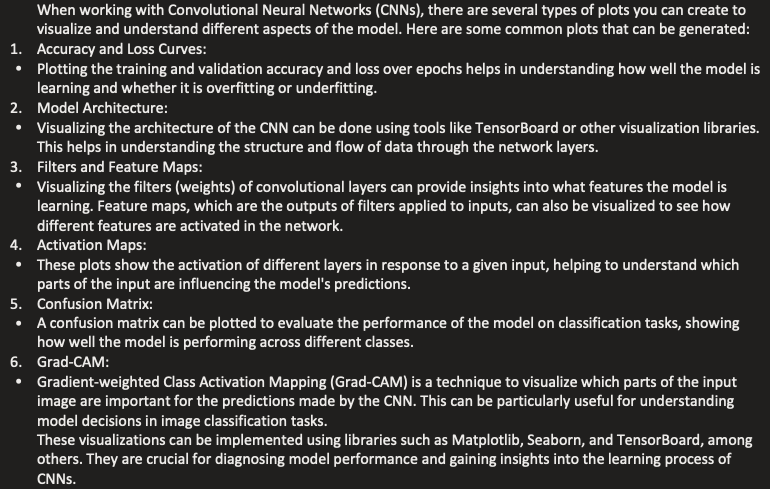

In [ ]:
# To load the model later to make predictions -
from tensorflow.keras.models import load_model

# Load the model
model = load_model('saved_model/melanoma_cnn_model.h5')

# Prediction for a new image data
# Note - need to convert Image file to numpy file, convert image to floating point & normalize the file and create image_data
prediction = model.predict(image_data)

# Interpret the prediction
if prediction[0] > 0.5:
    print("Prediction is malignant.")
else:
    print("Prediction is benign.")